In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os

#Load the cats VS dogs Dataset

In [ ]:
#Run the cells of this section to get the data in (x_train,y_train), (x_test,y_test)

In [ ]:
!gdown 1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
!gdown 1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
!gdown 1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
!gdown 1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN

!unzip /content/cats_test.zip
!unzip /content/cats_train.zip
!unzip /content/dogs_test.zip
!unzip /content/dogs_train.zip

Downloading...
From: https://drive.google.com/uc?id=1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
To: /content/cats_test.zip
100% 10.2M/10.2M [00:00<00:00, 49.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
To: /content/cats_train.zip
100% 21.1M/21.1M [00:00<00:00, 43.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
To: /content/dogs_test.zip
100% 11.8M/11.8M [00:00<00:00, 24.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN
To: /content/dogs_train.zip
100% 24.5M/24.5M [00:00<00:00, 110MB/s] 
Archive:  /content/cats_test.zip
   creating: cats_and_dogs_small/test/cats/
  inflating: cats_and_dogs_small/test/cats/cat.1699.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1502.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1984.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1612.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1658.jpg  
  inflating: ca

In [ ]:
cats_train_path = "/content/cats_and_dogs_small/train/cats"
cats_test_path = "/content/cats_and_dogs_small/test/cats"
dogs_train_path = "/content/cats_and_dogs_small/train/dogs"
dogs_test_path = "/content/cats_and_dogs_small/test/dogs"
train_dir = "/content/cats_and_dogs_small/train/"
testing_dir = "/content/cats_and_dogs_small/test/"

cats_train_images = [f for f in os.listdir(cats_train_path)]
cats_test_images = [f for f in os.listdir(cats_test_path)]
dogs_train_images = [f for f in os.listdir(dogs_train_path)]
dogs_test_images = [f for f in os.listdir(dogs_test_path)]

print(len(cats_train_images))
print(len(cats_test_images))
print(len(dogs_train_images))
print(len(dogs_test_images))

1000
500
1000
500


In [ ]:
cats_train = np.ndarray((len(cats_train_images),150,150,3), dtype= np.int32)
cats_test = np.ndarray((len(cats_test_images),150,150,3), dtype= np.int32)
dogs_train = np.ndarray((len(dogs_train_images),150,150,3), dtype= np.int32)
dogs_test = np.ndarray((len(dogs_test_images),150,150,3), dtype= np.int32)

for i,img_name in enumerate(cats_train_images):
  img = Image.open("/content/cats_and_dogs_small/train/cats/" + img_name).resize((150,150))
  cats_train[i] = np.asarray(img)

for i,img_name in enumerate(cats_test_images):
  img = Image.open("/content/cats_and_dogs_small/test/cats/" + img_name).resize((150,150))
  cats_test[i] = np.asarray(img)

for i,img_name in enumerate(dogs_train_images):
  img = Image.open("/content/cats_and_dogs_small/train/dogs/" + img_name).resize((150,150))
  dogs_train[i] = np.asarray(img)

for i,img_name in enumerate(dogs_test_images):
  img = Image.open("/content/cats_and_dogs_small/test/dogs/" + img_name).resize((150,150))
  dogs_test[i] = np.asarray(img)

In [ ]:
training_images = np.concatenate((cats_train,dogs_train), axis=0)
testing_images = np.concatenate((cats_test,dogs_test), axis=0)

training_labels = np.concatenate((np.ones(len(cats_train),dtype= np.int32), \
                                  np.zeros(len(dogs_train),dtype= np.int32)))
testing_labels = np.concatenate((np.ones(len(cats_test),dtype= np.int32), \
                                 np.zeros(len(dogs_test),dtype= np.int32)))

print(training_images.shape)
print(testing_images.shape)
print(training_labels.shape)
print(testing_labels.shape)

(2000, 150, 150, 3)
(1000, 150, 150, 3)
(2000,)
(1000,)


In [ ]:
training_shuffler = np.random.permutation(len(training_images))
x_train = training_images[training_shuffler]
y_train = training_labels[training_shuffler].reshape(2000,-1)

testing_shuffler = np.random.permutation(len(testing_images))
x_test = testing_images[testing_shuffler]
y_test = testing_labels[testing_shuffler].reshape(1000,-1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


#Exploratory Data Analysis



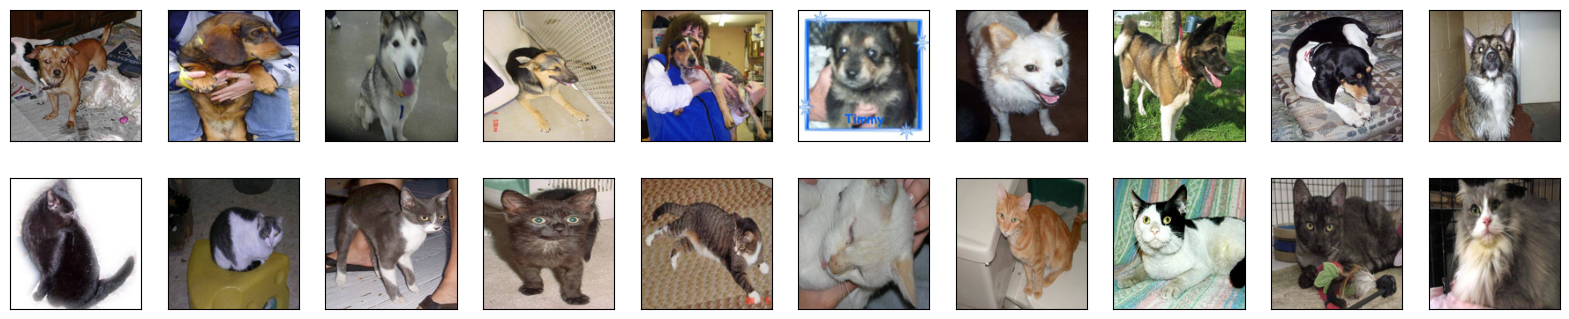

In [ ]:
#Take a minute to explore the data
#show 10 images from each class
fig = plt.figure(figsize=(20,4))
for label in range(2):
  for example in range(10):
    fig.add_subplot(2, 10, 1 + example + label*10, xticks=[], yticks=[])
    plt.imshow(x_train[np.where(y_train == label)[0]][example])
plt.show()


#Data preproceesing

In [ ]:
#Normalize images pixels values in range [0,1]
x_train = (x_train.astype('float32') / 255)
x_test = (x_test.astype('float32') / 255)




In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_categ1 = to_categorical(y_train)
y_test_categ1  = to_categorical(y_test)

#Classify the data using Dense Layers

In [ ]:
#Build a FCNN model to classify the data into cats and dogs
#You may use the same Architecture we used for CIFAR10 or any other Architecture
#Train the model
#plot loss and accuracy curves

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(150*150*3,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │    34,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,724,994 (132.47 MB)

 Trainable params: 34,724,994 (132.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate=10e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
history = model.fit(
          x_train.reshape(2000,-1), y_train_categ1 ,epochs=20, batch_size = 64,
          validation_data=(x_test.reshape(1000,-1),y_test_categ1))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5039 - loss: 343.7159 - val_accuracy: 0.4990 - val_loss: 1.7396
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4896 - loss: 1.2237 - val_accuracy: 0.5050 - val_loss: 0.7041
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5203 - loss: 0.7051 - val_accuracy: 0.5110 - val_loss: 0.6920
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5503 - loss: 0.6825 - val_accuracy: 0.5140 - val_loss: 0.7311
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5073 - loss: 0.7260 - val_accuracy: 0.5930 - val_loss: 0.6759
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5563 - loss: 0.6825 - val_accuracy: 0.5900 - val_loss: 0.6721
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5607 - loss: 0.6843 - val_accuracy: 0.5220 - val_loss: 0.7486
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5537 - loss: 0.7060 - val_accuracy: 0.5840 

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

#Classify the data using ConvNets

In [ ]:
#Build a CNN model to classify the data into cats and dogs
#The model Architecture is as follows:
  #1. conv layer with 32 filters of size (3,3) and relu activation
  #2. max pooling layer with filter size (2,2), stride= 2
  #3. conv layer with 64 filters of size (3,3) and relu activation
  #4. max pooling layer with filter size (2,2), stride= 2
  #5. conv layer with 128 filters of size (3,3) and relu activation
  #6. max pooling layer with filter size (2,2), stride= 2
  #7. conv layer with 128 filters of size (3,3) and relu activation
  #8. max pooling layer with filter size (2,2), stride= 2
  #9. Dense Layer with 512 neurons and relu activation
  #10.Output layer
#Train the model
#plot loss and accuracy curves
from keras.layers import  Conv2D, MaxPooling2D
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2),strides=2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
          x_train, y_train_categ1 ,epochs=20, batch_size = 64,
          validation_data=(x_test,y_test_categ1))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - accuracy: 0.5186 - loss: 1.1500 - val_accuracy: 0.5000 - val_loss: 0.6970
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5381 - loss: 0.6969 - val_accuracy: 0.5180 - val_loss: 0.6905
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5350 - loss: 0.6919 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5962 - loss: 0.6786 - val_accuracy: 0.6180 - val_loss: 0.6652
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6027 - loss: 0.6613 - val_accuracy: 0.5590 - val_loss: 0.7662
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6326 - loss: 0.6425 - val_accuracy: 0.6330 - val_loss: 0.7054
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6727 - loss: 0.6026 - val_accuracy: 0.5990 - val_loss: 0.6524
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6700 - loss: 0.6024 - val_accuracy: 0.6460 -

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

#Dropout and Data Augmentation


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
#Use dropout and Data Augmentation to enhance the model performance
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_augumentation = ImageDataGenerator(
	    rotation_range=30,
      width_shift_range=0.25,
      height_shift_range=0.25,
      shear_range=0.25,
      zoom_range=0.25,
      horizontal_flip=True,
      fill_mode='nearest')


training_augumentation.fit(x_train)
train_aug= training_augumentation.flow(
	x_train,y_train,
  batch_size=64
)





model=models.Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=['accuracy'])

history=model.fit(train_aug, epochs=40,validation_data=(x_test,y_test))


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 503ms/step - accuracy: 0.5152 - loss: 0.7028 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 375ms/step - accuracy: 0.5222 - loss: 0.6937 - val_accuracy: 0.5220 - val_loss: 0.6920
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 444ms/step - accuracy: 0.5122 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.7057
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 383ms/step - accuracy: 0.5370 - loss: 0.6949 - val_accuracy: 0.5130 - val_loss: 0.6881
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 380ms/step - accuracy: 0.5579 - loss: 0.6896 - val_accuracy: 0.5330 - val_loss: 0.6844
Epoch 6/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 384ms/step - accuracy: 0.5731 - loss: 0.6835 - val_accuracy: 0.5570 - val_loss: 0.6713
Epoch 7/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 384ms/step - accuracy: 0.6109 - loss: 0.6639 - val_accuracy: 0.6190 - val_loss: 0.6632
Epoch 8/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step - accuracy: 0.6205 - loss: 0.6519 - val_accu

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

#Transfer Learning (VGG16)

In [ ]:
#Build a model with the help of a pretrained network (VGG16)
#The model Architecture is as follows:
  #1. the conv base of VGG16 (non trainable)
  #2. Dense Layer with 256 neurons and relu activation
  #3. Output layer
#Train the model
#plot loss and accuracy curves

from tensorflow.keras.applications import VGG16
from keras import models
from keras import layers

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
conv_base.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(
          x_train, y_train_categ1, epochs=20, batch_size = 64,
          validation_data=(x_test, y_test_categ1))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 751ms/step - acc: 0.7008 - loss: 0.5980 - val_acc: 0.8210 - val_loss: 0.4411
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - acc: 0.8373 - loss: 0.4107 - val_acc: 0.8460 - val_loss: 0.3706
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - acc: 0.8767 - loss: 0.3313 - val_acc: 0.8620 - val_loss: 0.3315
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 281ms/step - acc: 0.8902 - loss: 0.2911 - val_acc: 0.8690 - val_loss: 0.3153
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 285ms/step - acc: 0.9036 - loss: 0.2571 - val_acc: 0.8340 - val_loss: 0.3366
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step - acc: 0.9269 - loss: 0.2285 - val_acc: 0.8810 - val_loss: 0.2908
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step - acc: 0.9242 - loss: 0.2151 - val_acc: 0.8790 - val_loss: 0.2893
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 287ms/step - acc: 0.9327 - loss: 0.2085 - val_acc: 0.8790 - val_loss: 0.2781
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 285ms/step - a

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

#Data Augmentation with Transfer Learning


In [ ]:
#Bonus Task:
#use Data Augmentation to enhance the model performance
#you should get a boost of the validation accuracy

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
conv_base.trainable = False

from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

train_aug_categ= training_augumentation.flow(
	x_train,y_train_categ1,
  batch_size=64
)

history=model.fit(train_aug_categ, epochs=70, validation_data=(x_test, y_test_categ1))


Epoch 1/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 925ms/step - acc: 0.5365 - loss: 0.7176 - val_acc: 0.7940 - val_loss: 0.5286
Epoch 2/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 538ms/step - acc: 0.7391 - loss: 0.5693 - val_acc: 0.8280 - val_loss: 0.4497
Epoch 3/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 542ms/step - acc: 0.7659 - loss: 0.5084 - val_acc: 0.8200 - val_loss: 0.4127
Epoch 4/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 533ms/step - acc: 0.7646 - loss: 0.4888 - val_acc: 0.8660 - val_loss: 0.3614
Epoch 5/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 538ms/step - acc: 0.8025 - loss: 0.4431 - val_acc: 0.8690 - val_loss: 0.3380
Epoch 6/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 533ms/step - acc: 0.8060 - loss: 0.4369 - val_acc: 0.8740 - val_loss: 0.3240
Epoch 7/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 541ms/step - acc: 0.8105 - loss: 0.4205 - val_acc: 0.8680 - val_loss: 0.3133
Epoch 8/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 533ms/step - acc: 0.8429 - loss: 0.3792 - val_acc: 0.8750 - val_loss: 0.3003
Epoch 9/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 554ms/

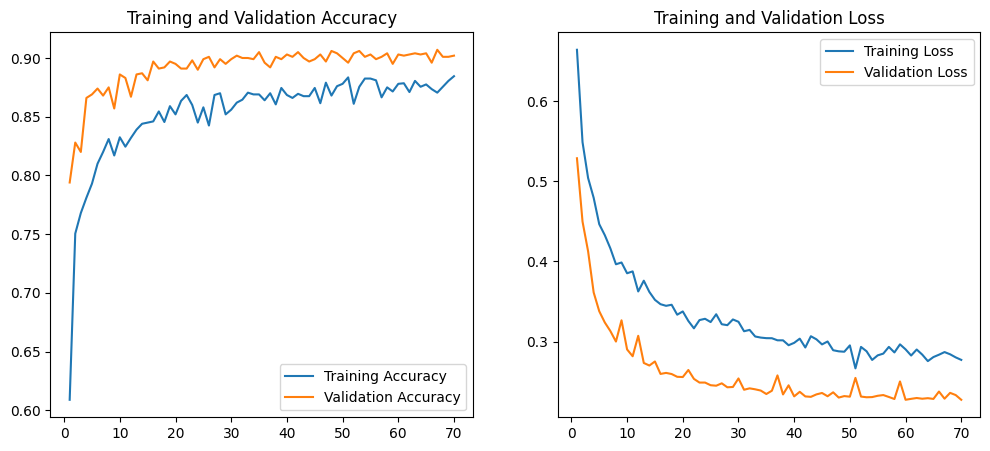

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc)+1)

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()